# Jan Izydorczyk
## Sprawozdanie 2

In [2]:
from numpy import float32,float64,log2
import sys
from matplotlib import pyplot as plt
import math
import numpy as np
import random
%matplotlib notebook

print("Wersja Pythona:")
print (sys.version)
print(f"Wersja numpy: {np.__version__}")
print("Konfiguracja liczb zmiennoprzecinkowych")
print(sys.float_info)

f64 = np.float64
f32 = np.float32

Wersja Pythona:
3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 22:22:05) [MSC v.1916 64 bit (AMD64)]
Wersja numpy: 1.20.1
Konfiguracja liczb zmiennoprzecinkowych
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


# Zadanie 1

In [16]:
def get_interpolation(xs, ys):
    def f(x):
        reses = np.zeros(len(xs))
        for i in range(len(xs)):
            res = 1             
            for j in range(len(xs)):
                if i == j:
                    continue
                res *= (x - xs[j]) / (xs[i] - xs[j])
            reses[i] = res
        return np.dot(reses, ys)
    return f

In [69]:
def plot_inter(f, n, r = (-5, 5), generator = lambda r, n: np.linspace(r[0], r[1], n)):
    xs_in = generator(r, n)
    ys_in = f(xs_in)

    inter_f = get_interpolation(xs_in, ys_in)
    
    xs = np.linspace(r[0], r[1], 1000)
    ys = f(xs)
    ys_res = np.array(list(map(inter_f, xs)))
    
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    
    axs[0].plot(xs, ys)
    axs[0].plot(xs, ys_res)
    axs[0].set_ylim(-2, 2)
    axs[0].set_title('Functions')

    
    axs[1].plot(xs, ys_res - ys)
    axs[1].set_ylim(-2, 2)
    axs[1].set_title('Error')
    
    fig.suptitle(f'N = {n}')

In [70]:
def f(x):
    return 1 / (1 + x ** 2)

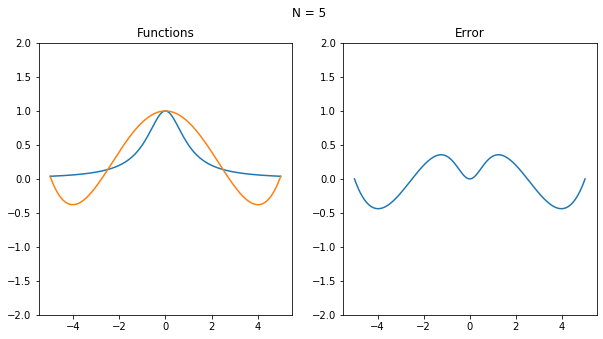

In [71]:
plot_inter(f, 5)

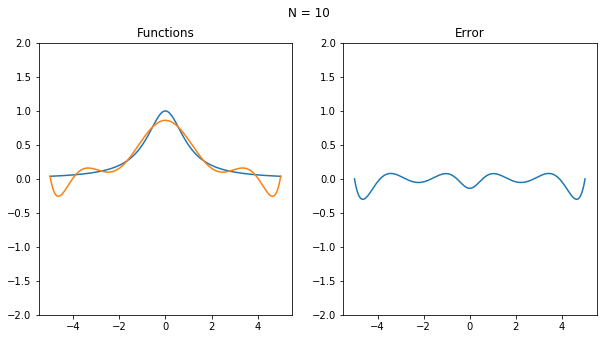

In [72]:
plot_inter(f, 10)

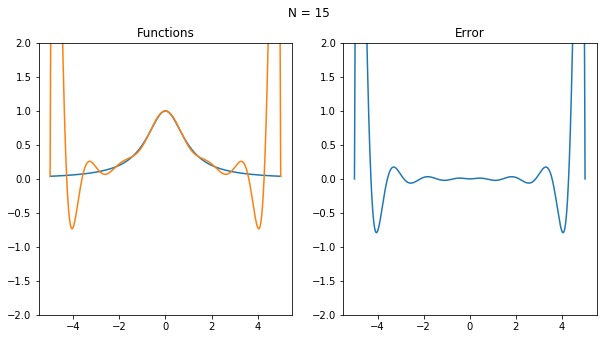

In [73]:
plot_inter(f, 15)

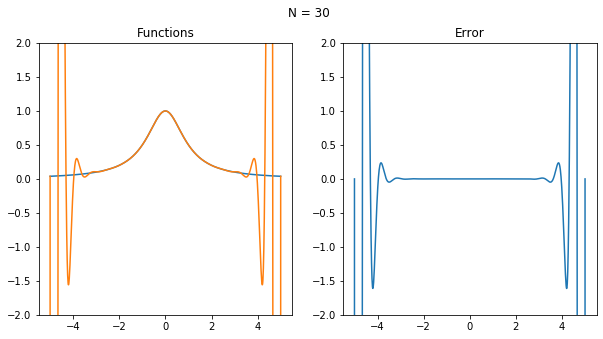

In [74]:
plot_inter(f, 30)

# Zadanie 2

In [82]:
def czebyszew_generator(r, n):
    return 0.5 * (r[0] + r[1]) + 0.5 * (r[1] - r[0]) * np.cos((2 * np.arange(1, n + 1) - 1) * np.pi / (2 * n))

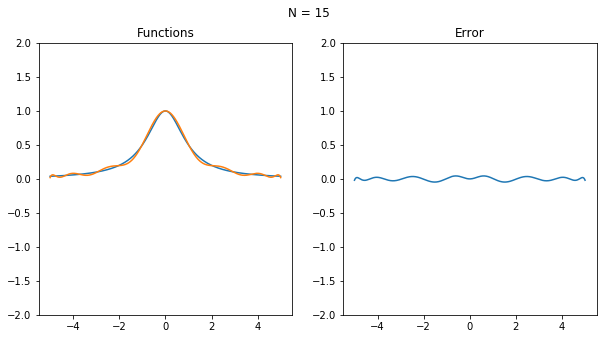

In [83]:
plot_inter(f, 15, generator=czebyszew_generator)

Bład uległ znacznemu zmniejszeniu. Wynika to z gestszego upakowanie wezlow przy krancach przedzialu, co niweluje efekt Rungego.

# Zadanie 3

In [3]:
a, b = 1, 2

t = np.linspace(0, 2 * np.pi, 1000)
x_perf = a * np.cos(t)
y_perf = b * np.sin(t)

## Rysunek dla dokładnej elipsy

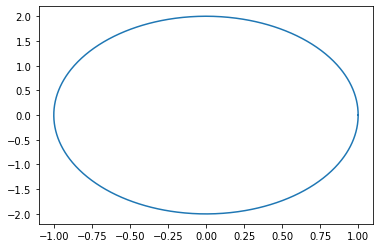

In [4]:
plt.plot(x_perf, y_perf)

In [5]:
def apply_polynomial(x_0, coof):
    def f(x):
        res = coof[0]
        for c in coof[1:]:
            res = res * (x - x_0) + c
        return res
    return f

In [6]:
def get_cubic_splines(xs, ys):
    hi = xs[1:] - xs[:-1]
    n = len(xs)
    mat = np.zeros(shape=(n, n))
    for idx in range(n):
        mat[idx][idx - 1] = hi[idx - 1]
        mat[idx][idx] = 2 * (hi[idx - 1] + hi[idx % (n - 1)])
        mat[idx][(idx + 1) % n] = hi[(idx) % (n -1)]
    deltas = (ys[1:] - ys[:-1]) / hi
    
    Y = np.array([deltas[(i) % (n - 1)] - deltas[i - 1] for i in range(n)])
    sigmas = np.linalg.solve(mat, Y)
    ai = ys[:-1]
    bi = deltas - hi * (sigmas[1:] + 2 * sigmas[:-1])
    ci = 3 * sigmas[:-1]
    di = (sigmas[1:] - sigmas[:-1]) / hi
    def f(x):
        idx = 0
        for i in range(1, n-1):
            if x >= xs[i]:
                idx += 1
            else:
                break
        a, b, c, d = ai[idx], bi[idx], ci[idx], di[idx]
        x_0 = xs[idx]
        return apply_polynomial(x_0, [d, c, b, a])(x)
    return f

## Rysunek dla interpolowanej elipsy

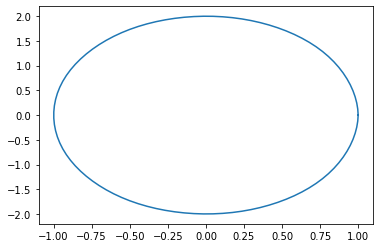

In [8]:
t = np.linspace(0, 2 * np.pi, 10)
fx = get_cubic_splines(t, a * np.cos(t))
fy = get_cubic_splines(t, b * np.sin(t))

ts = np.linspace(0, 2 * np.pi, 100)
ys = np.array(list(map(fy, ts)))
xs = np.array(list(map(fx, ts)))
plt.plot(xs, ys)